In [ ]:
import pandas as pd;
from scipy.stats import zscore
import torch as torch;
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files
 
 
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-



np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#read in the dataset, convert to numpy
dfData = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

np_x=dfData[list(dfData.columns)[0:-1]].apply(zscore).to_numpy();
np_y = pd.get_dummies(dfData['variety']).to_numpy();

n_classes = 3;
n_features = np_x.shape[1];

x_train=np_x
y_train=np_y

#define pytorch linear binary classifier


# create tensor variables for data, we do not need gradient w.r.t. to them
t_x_train=torch.tensor(x_train,requires_grad=False,device=device);
t_y_train=torch.tensor(y_train,requires_grad=False,device=device);


#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);

# this optimizer will do gradient descent for us
learning_rate = 0.001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    
    print(i,risk.item(),accuracy)

Streaming output truncated to the last 5000 lines.
5000 0.4016788665143869 0.8533333333333334
5001 0.4016563779184811 0.8533333333333334
5002 0.40163389498315955 0.8533333333333334
5003 0.4016114177054998 0.8533333333333334
5004 0.4015889464700777 0.8533333333333334
5005 0.40156648088640895 0.8533333333333334
5006 0.4015440217354358 0.8533333333333334
5007 0.40152156823044277 0.8533333333333334
5008 0.4014991203685175 0.8533333333333334
5009 0.4014766785340376 0.8533333333333334
5010 0.40145424233673743 0.8533333333333334
5011 0.40143181255735305 0.8533333333333334
5012 0.4014093884093953 0.8533333333333334
5013 0.4013869698899621 0.8533333333333334
5014 0.4013645573832326 0.8533333333333334
5015 0.40134215049915983 0.8533333333333334
5016 0.4013197500182736 0.8533333333333334
5017 0.4012973551543109 0.8533333333333334
5018 0.4012749659043801 0.8533333333333334
5019 0.401252582652462 0.8533333333333334
5020 0.40123020500872797 0.8533333333333334
5021 0.4012078337535014 0.85333333333333

In [ ]:
import matplotlib.pyplot as plt
risk_list=[]
risk1=[]
risk2=[]
risk3=[]
epochs=range(0,10000)
accuracy_list=[]
a1=[]
a2=[]
a3=[]
#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
############################################################################
# this optimizer will do gradient descent for us
learning_rate = 0.001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );
    

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk1.append(risk.item())
    a1.append(accuracy)

risk_list.append(risk1)
accuracy_list.append(a1)

######################################################################################
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.0001;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );
    

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk2.append(risk.item())
    a2.append(accuracy)

risk_list.append(risk2)
accuracy_list.append(a2)
#######################################################################################3
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.1;
optimizer = torch.optim.SGD([W,b],lr=learning_rate)
#optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );
    

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk3.append(risk.item())
    a3.append(accuracy)

risk_list.append(risk3)
accuracy_list.append(a3)



In [ ]:
dict1={}
dict2={}
dict1["SGD:Learning rate 0.001"]=risk_list[0]
dict1["SGD:Learning rate 0.0001"]=risk_list[1]
dict1["SGD:Learning rate 0.1"]=risk_list[2]

dict2["SGD:Learning rate 0.001"]=accuracy_list[0]
dict2["SGD:Learning rate 0.0001"]=accuracy_list[1]
dict2["SGD:Learning rate 0.1"]=accuracy_list[2]

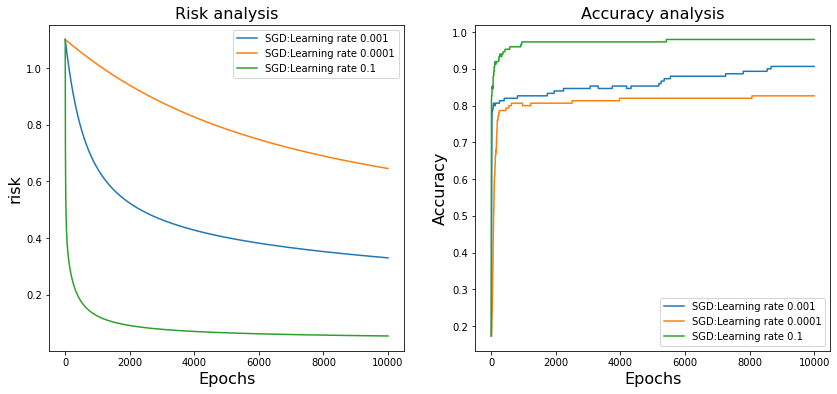

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot the loss vs Epochs
#


ax[0].plot(epochs, dict1["SGD:Learning rate 0.001"], label='SGD:Learning rate 0.001')
ax[0].plot(epochs, dict1["SGD:Learning rate 0.0001"], label='SGD:Learning rate 0.0001')
ax[0].plot(epochs, dict1["SGD:Learning rate 0.1"], label='SGD:Learning rate 0.1')
ax[0].set_title('Risk analysis', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('risk', fontsize=16)
ax[0].legend()
#
# Plot the model accuracy vs Epochs
#
ax[1].plot(epochs, dict2["SGD:Learning rate 0.001"], label='SGD:Learning rate 0.001')
ax[1].plot(epochs, dict2["SGD:Learning rate 0.0001"], label='SGD:Learning rate 0.0001')
ax[1].plot(epochs, dict2["SGD:Learning rate 0.1"], label='SGD:Learning rate 0.1')
ax[1].set_title('Accuracy analysis', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].legend()



In [ ]:
import matplotlib.pyplot as plt
risk_list=[]
risk1=[]
risk2=[]
risk3=[]
epochs=range(0,10000)
accuracy_list=[]
a1=[]
a2=[]
a3=[]
#define starting value of weights W for gradient descent
init_std_dev = 0.01;
initialW=init_std_dev*np.random.randn(n_features,n_classes)

# create a PyTorch tensor variable for W and b. 
# we will be optimizing over W, b, finding their best value using gradient descent, so we need gradient enabled
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
############################################################################
# this optimizer will do gradient descent for us
learning_rate = 0.001;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );
    

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk1.append(risk.item())
    a1.append(accuracy)

risk_list.append(risk1)
accuracy_list.append(a1)

######################################################################################
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.0001;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );
    

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk2.append(risk.item())
    a2.append(accuracy)

risk_list.append(risk2)
accuracy_list.append(a2)
#######################################################################################3
W = torch.tensor(initialW,requires_grad=True,device=device);
b = torch.zeros((1,n_classes),requires_grad=True,device=device);
# this optimizer will do gradient descent for us
learning_rate = 0.1;
#optimizer = torch.optim.SGD([W,b],lr=learning_rate)
optimizer = torch.optim.Adam([W,b],lr=learning_rate)

n_epochs = 10000;
for i in range(n_epochs):
    # clear previous gradient calculations
    optimizer.zero_grad();
    
    # calculate model predictions
    # calculate model predictions
    linear_predictions = torch.matmul(t_x_train,W)+b
    activations =  torch.exp(linear_predictions);
    
    #Passing through softmax
    sum_activations = torch.sum(activations,dim=1,keepdim=True)
    normalized_activations = torch.div(activations, sum_activations);
    cross_entropy_loss = torch.sum(torch.multiply(t_y_train,torch.log(normalized_activations)),dim=1 )
    risk = -1.0 * torch.mean(cross_entropy_loss );
    

    #calculate gradients of risk w.r.t. W,b and propagate them back
    risk.backward();

    # use the gradient to change W, b
    optimizer.step();

    # calculate accuracy (on the training set!)
    true_class = np.argmax(t_y_train.detach().cpu().numpy(),axis=1)
    pred_class = np.argmax(activations.detach().cpu().numpy(),axis=1)
    accuracy = np.count_nonzero(true_class == pred_class)/pred_class.shape[0];
    error = 1.0 - accuracy;
    risk3.append(risk.item())
    a3.append(accuracy)

risk_list.append(risk3)
accuracy_list.append(a3)



In [ ]:
dict1={}
dict2={}
dict1["ADM:Learning rate 0.001"]=risk_list[0]
dict1["ADM:Learning rate 0.0001"]=risk_list[1]
dict1["ADM:Learning rate 0.1"]=risk_list[2]

dict2["ADM:Learning rate 0.001"]=accuracy_list[0]
dict2["ADM:Learning rate 0.0001"]=accuracy_list[1]
dict2["ADM:Learning rate 0.1"]=accuracy_list[2]

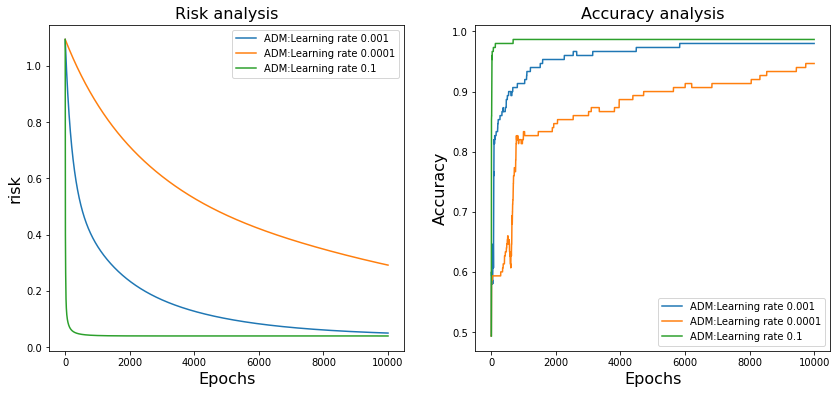

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot the loss vs Epochs
#


ax[0].plot(epochs, dict1["ADM:Learning rate 0.001"], label='ADM:Learning rate 0.001')
ax[0].plot(epochs, dict1["ADM:Learning rate 0.0001"], label='ADM:Learning rate 0.0001')
ax[0].plot(epochs, dict1["ADM:Learning rate 0.1"], label='ADM:Learning rate 0.1')
ax[0].set_title('Risk analysis', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('risk', fontsize=16)
ax[0].legend()
#
# Plot the model accuracy vs Epochs
#
ax[1].plot(epochs, dict2["ADM:Learning rate 0.001"], label='ADM:Learning rate 0.001')
ax[1].plot(epochs, dict2["ADM:Learning rate 0.0001"], label='ADM:Learning rate 0.0001')
ax[1].plot(epochs, dict2["ADM:Learning rate 0.1"], label='ADM:Learning rate 0.1')
ax[1].set_title('Accuracy analysis', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].legend()

